In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR,SVC
from sklearn.linear_model import LinearRegression, ElasticNet,Ridge,Lasso,RidgeClassifierCV
from sklearn.model_selection import KFold  
from sklearn.feature_selection import SelectPercentile, f_regression
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
import copy as cp
from sklearn.preprocessing import MaxAbsScaler, Normalizer
from sklearn.svm import LinearSVR
from tpot.builtins import StackingEstimator
from imblearn.under_sampling import NearMiss ,RandomUnderSampler, NeighbourhoodCleaningRule, OneSidedSelection, AllKNN
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor
from imblearn.ensemble import EasyEnsemble 
from sklearn.metrics import f1_score, accuracy_score
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE, ADASYN

In [12]:
train = pd.read_csv("../data/processed/train.csv")
test = pd.read_csv("../data/processed/test.csv")

In [13]:
train.pop("id")
test.pop("id")
target = train.pop("血糖")

train_x= train.as_matrix()
train_y = target.as_matrix()
test_x = test.as_matrix()

In [14]:
exported_pipeline = make_pipeline(
    MaxAbsScaler(),
    StackingEstimator(estimator=LinearSVR(C=0.01, dual=False, epsilon=1.0, loss="squared_epsilon_insensitive", tol=0.001)),
    StackingEstimator(estimator=RidgeCV()),
    lgb.LGBMRegressor(objective='regression',
                    boosting_type ="GBDT",
                    num_leaves=17,
                    learning_rate=0.01,
                    feature_fraction=0.5,
                    bagging_fraction=0.5,
                    bagging_freq=5,
                    reg_alpha=1,
                    reg_lambda=0.5,
                    n_estimators=500)
    )
exported_pipeline.fit(train_x, train_y)
results = exported_pipeline.predict(test_x)

C:\Users\altman\Anaconda3\lib\site-packages\lightgbm\basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
C:\Users\altman\Anaconda3\lib\site-packages\lightgbm\basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)


In [15]:
#results[313] = 15.4860937360076
#results[938] = 17.5400019823901

In [16]:
result = pd.DataFrame()
result[0] = results
#result.to_csv("../result/test.csv", header=None, index=False,encoding="utf-8")
result.describe()

,0
count,1000.000000
mean,5.662628
std,0.736924
min,4.890459
25%,5.179281
50%,5.448285
75%,5.883165
max,10.731700


,0
33,9.021225
313,9.856516
928,9.238442
938,10.731700
973,9.138117


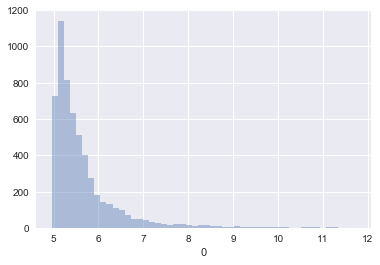

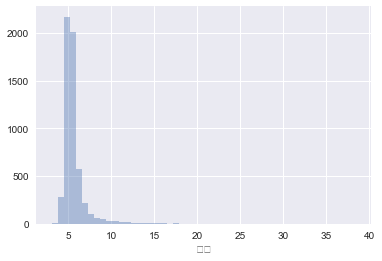

,predict,true
count,5642.000000,5642.000000
mean,5.638709,5.631925
std,0.775490,1.544882
min,4.958299,3.070000
25%,5.172766,4.920000
50%,5.393501,5.290000
75%,5.774410,5.767500
max,11.736453,38.430000


,predict,true,diff
10,5.693488,4.44,1.253488
1312,5.023145,4.44,0.583145
1341,5.053110,4.44,0.613110
1374,5.958862,4.44,1.518862
1389,5.368889,4.44,0.928889
1441,5.696990,4.44,1.256990
2308,5.466027,4.44,1.026027
4372,5.019519,4.44,0.579519
4499,5.231396,4.44,0.791396
5429,5.041566,4.44,0.601566


predict    139
true       139
diff       139
dtype: int64

609.5960279266878

-1313.0971836080944

,new,best
0,5.294659,5.981134
1,5.242847,5.758209
2,5.270023,5.203835
3,5.120046,5.961118
4,5.141226,5.179146


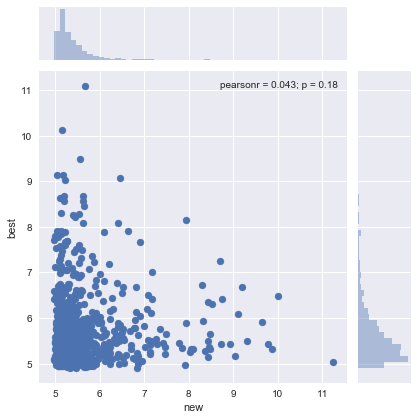

,new,best
count,5642.000000,1000.000000
mean,5.638709,5.661539
std,0.775490,0.743849
min,4.958299,4.900321
25%,5.172766,5.175076
50%,5.393501,5.441421
75%,5.774410,5.836757
max,11.736453,11.090173


,new,best
120,10.015853,6.482781
127,11.233167,5.026522
1832,10.013706,NaN
1993,10.587168,NaN
2070,10.465944,NaN
2186,10.907697,NaN
2386,10.665617,NaN
2481,10.208546,NaN
2507,11.065704,NaN
2683,10.186786,NaN


(5642,)

count    5642.000000
mean        5.631925
std         1.544882
min         3.070000
25%         4.920000
50%         5.290000
75%         5.767500
max        38.430000
Name: 血糖, dtype: float64

0       6.06
1       5.39
2       5.59
3       4.30
4       5.42
5       5.97
6       5.11
7       5.94
8       5.66
9       5.48
10      4.44
11      5.48
12      5.32
13      5.08
14      4.63
15      4.92
17      4.66
19      4.29
20      4.55
21      5.16
22      5.13
23      4.37
24      5.17
25      4.64
26      5.82
28      5.10
29      5.41
30      5.48
32      5.53
33      5.31
        ... 
5608    5.33
5609    5.70
5611    4.56
5612    5.32
5613    5.63
5614    4.84
5615    5.44
5616    4.79
5617    4.82
5618    5.25
5619    4.71
5621    5.56
5622    5.07
5623    5.60
5624    5.32
5625    5.40
5626    5.39
5628    5.52
5629    5.29
5630    5.43
5631    5.58
5632    5.18
5633    5.25
5634    5.15
5635    6.01
5636    5.11
5637    5.45
5638    5.13
5639    5.24
5641    6.00
Name: 血糖, Length: 4721, dtype: float64

4605


C:\Users\altman\Anaconda3\lib\site-packages\lightgbm\basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
C:\Users\altman\Anaconda3\lib\site-packages\lightgbm\basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)
C:\Users\altman\Anaconda3\lib\site-packages\lightgbm\basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
C:\Users\altman\Anaconda3\lib\site-packages\lightgbm\basic.py:648: LGBMDeprecationWar

,0
count,1000.000000
mean,5.746360
std,0.790939
min,4.958792
25%,5.220181
50%,5.495747
75%,5.952923
max,10.870082


,0
313,10.753198
938,10.582408
